In [1]:
from scipy.stats import hypergeom
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Run if jupyterthemes installed
from jupyterthemes import jtplot
jtplot.style(theme='gruvboxd')

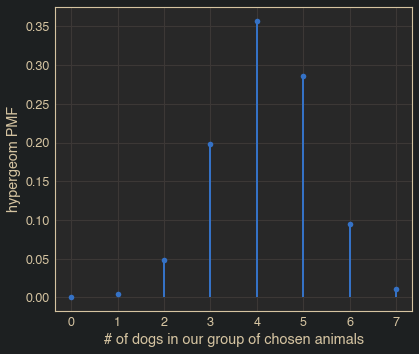

In [3]:
[M, n, N] = [20, 7, 12]
rv = hypergeom(M, n, N)
x = np.arange(0, n+1)
pmf_dogs = rv.pmf(x)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, pmf_dogs, 'bo')
ax.vlines(x, 0, pmf_dogs, lw=2)
ax.set_xlabel('# of dogs in our group of chosen animals')
ax.set_ylabel('hypergeom PMF')
plt.show()

In [4]:
df = pd.read_csv('output/data.csv')
df

,AfterProbiotic,(12 or 13)-methylmyristate (a15:0 or i15:0),(14 or 15)-methylpalmitate (a17:0 or i17:0),(16 or 17)-methylstearate (a19:0 or i19:0),(3'-5')-adenylyladenosine*,(3'-5')-adenylylcytidine,(3'-5')-adenylyluridine,(3'-5')-cytidylylcytidine*,(3'-5')-cytidylylguanosine,(3'-5')-cytidylyluridine*,...,sedoheptulose,suberate (C8-DC),succinate,succinimide,threonate,tricarballylate,urate,xylose,mouseID,isMale
0,0,0.097699,0.031264,0.011751,0.002530,0.001595,0.002532,0.002700,0.001522,0.002641,...,0.040729,0.024735,0.347333,0.021981,0.155677,0.241432,0.048367,0.149068,1,1
1,1,0.158941,0.033450,0.010874,0.000659,0.000659,0.000659,0.000659,0.000659,0.001236,...,0.034188,0.042743,0.374643,0.033852,0.088292,0.078611,0.044431,0.180184,1,1
2,0,0.119596,0.034288,0.011585,0.001485,0.000785,0.001638,0.001818,0.000785,0.001973,...,0.060845,0.033103,0.286650,0.030653,0.116940,0.197009,0.045180,0.168328,2,1
3,1,0.130916,0.037041,0.015447,0.000921,0.000921,0.000921,0.000921,0.000921,0.000921,...,0.091777,0.035994,0.442962,0.022208,0.078139,0.105422,0.032510,0.140046,2,1
4,0,0.103788,0.037460,0.014543,0.002526,0.002436,0.002764,0.003566,0.000709,0.003389,...,0.034373,0.032385,0.286454,0.028730,0.195996,0.328468,0.057677,0.072740,3,1
5,1,0.154498,0.036943,0.014053,0.003345,0.002256,0.003578,0.003453,0.002385,0.003525,...,0.058926,0.044877,0.361670,0.031210,0.124713,0.139020,0.063091,0.093225,3,1
6,0,0.178249,0.040164,0.015899,0.003001,0.002235,0.003103,0.003046,0.000941,0.003117,...,0.021816,0.030599,0.344763,0.029454,0.153957,0.253468,0.063587,0.118900,4,0
7,1,0.111626,0.030752,0.011096,0.000832,0.000832,0.000832,0.000832,0.000832,0.000832,...,0.021584,0.033518,0.245637,0.020587,0.185380,0.159851,0.082961,0.101554,4,0
8,0,0.160207,0.038966,0.013056,0.002832,0.001893,0.003246,0.000934,0.000934,0.002383,...,0.026331,0.027682,0.240438,0.023459,0.121336,0.197046,0.052422,0.287363,5,0
9,1,0.129253,0.031197,0.011793,0.001061,0.001061,0.001061,0.003476,0.001061,0.003567,...,0.023904,0.030442,0.216346,0.024343,0.199169,0.174640,0.081636,0.055060,5,0
